In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (20,30)
from pywt import wavedec


SPLIT_ID = 'S9'
data_dir = fr'D:\FINKI\40_diploma_thesis\data\splits\{SPLIT_ID.lower()}'
FEATURE = 'HostService_64kHz_vibration_1'

In [9]:
x_train = np.load(f'{data_dir}/x_train_{FEATURE}.npy')
y_train = np.load(f'{data_dir}\y_train.npy', allow_pickle = True)

In [10]:
healthy_signal = x_train[0]
damaged_signal = x_train[-1]

In [11]:
healthy_signal.shape

(64000,)

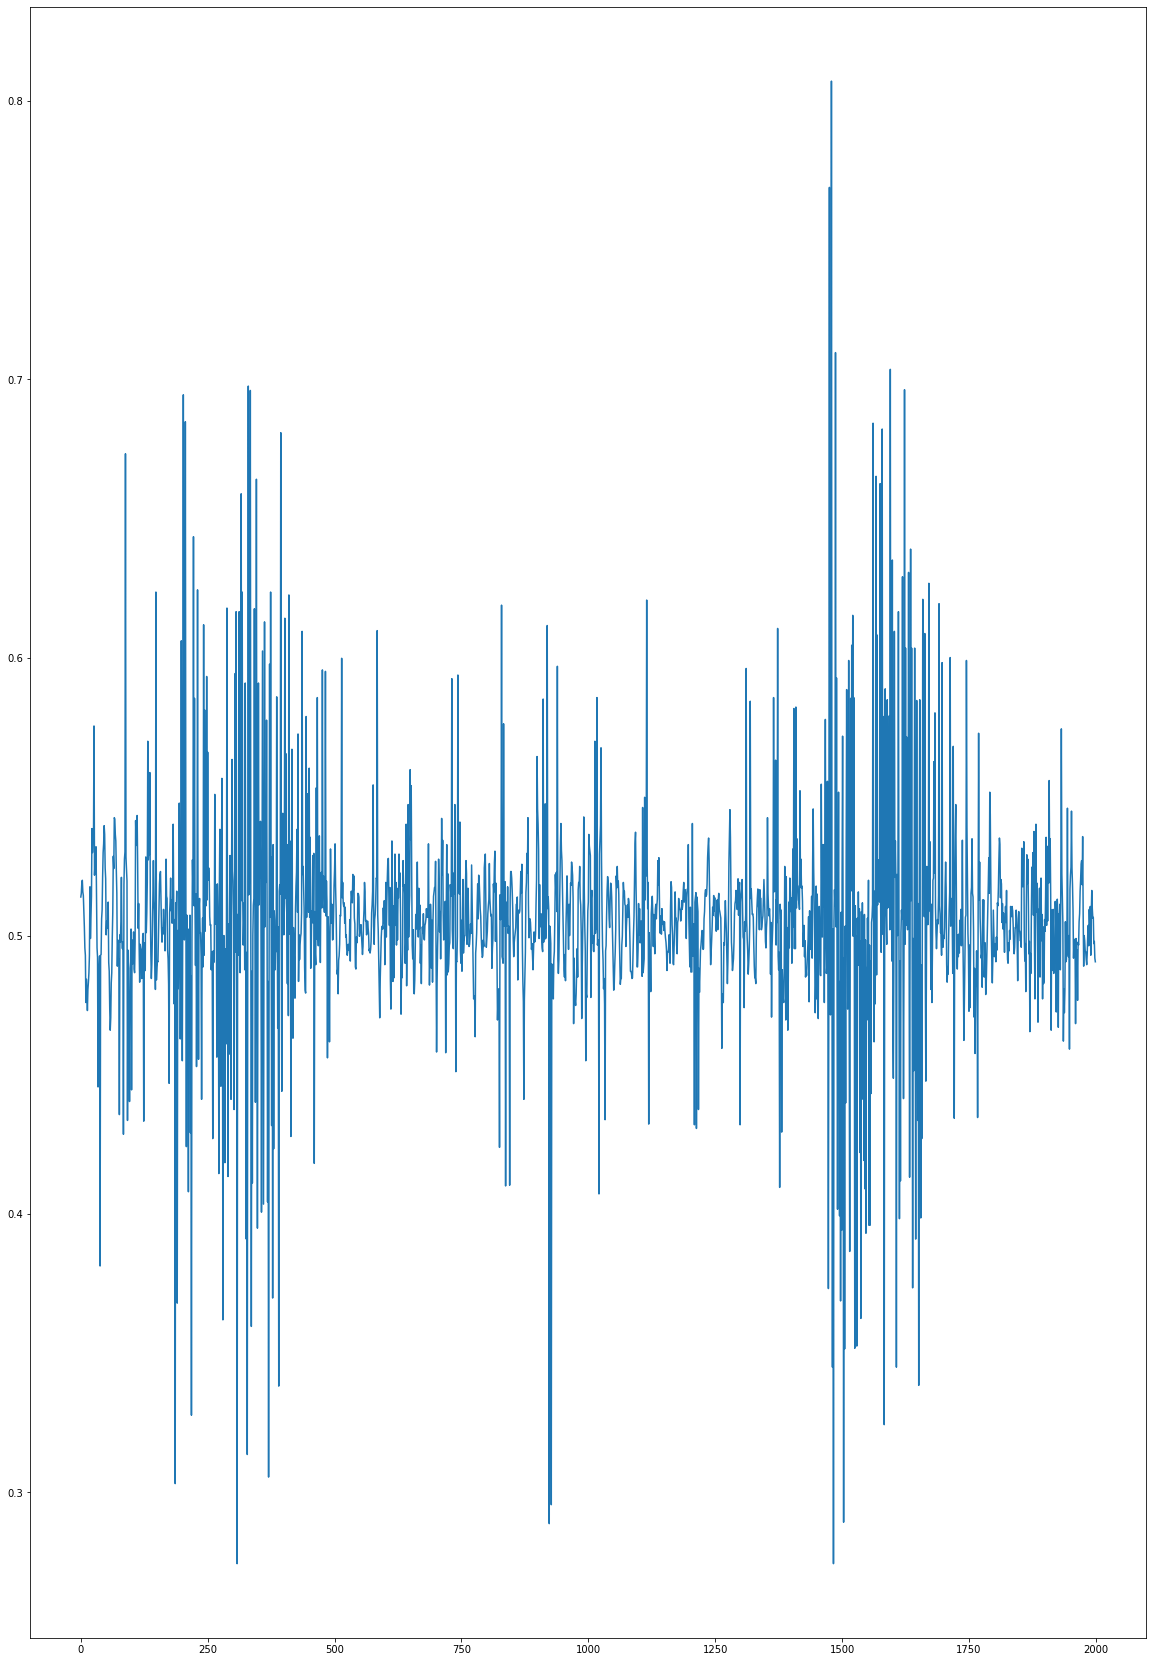

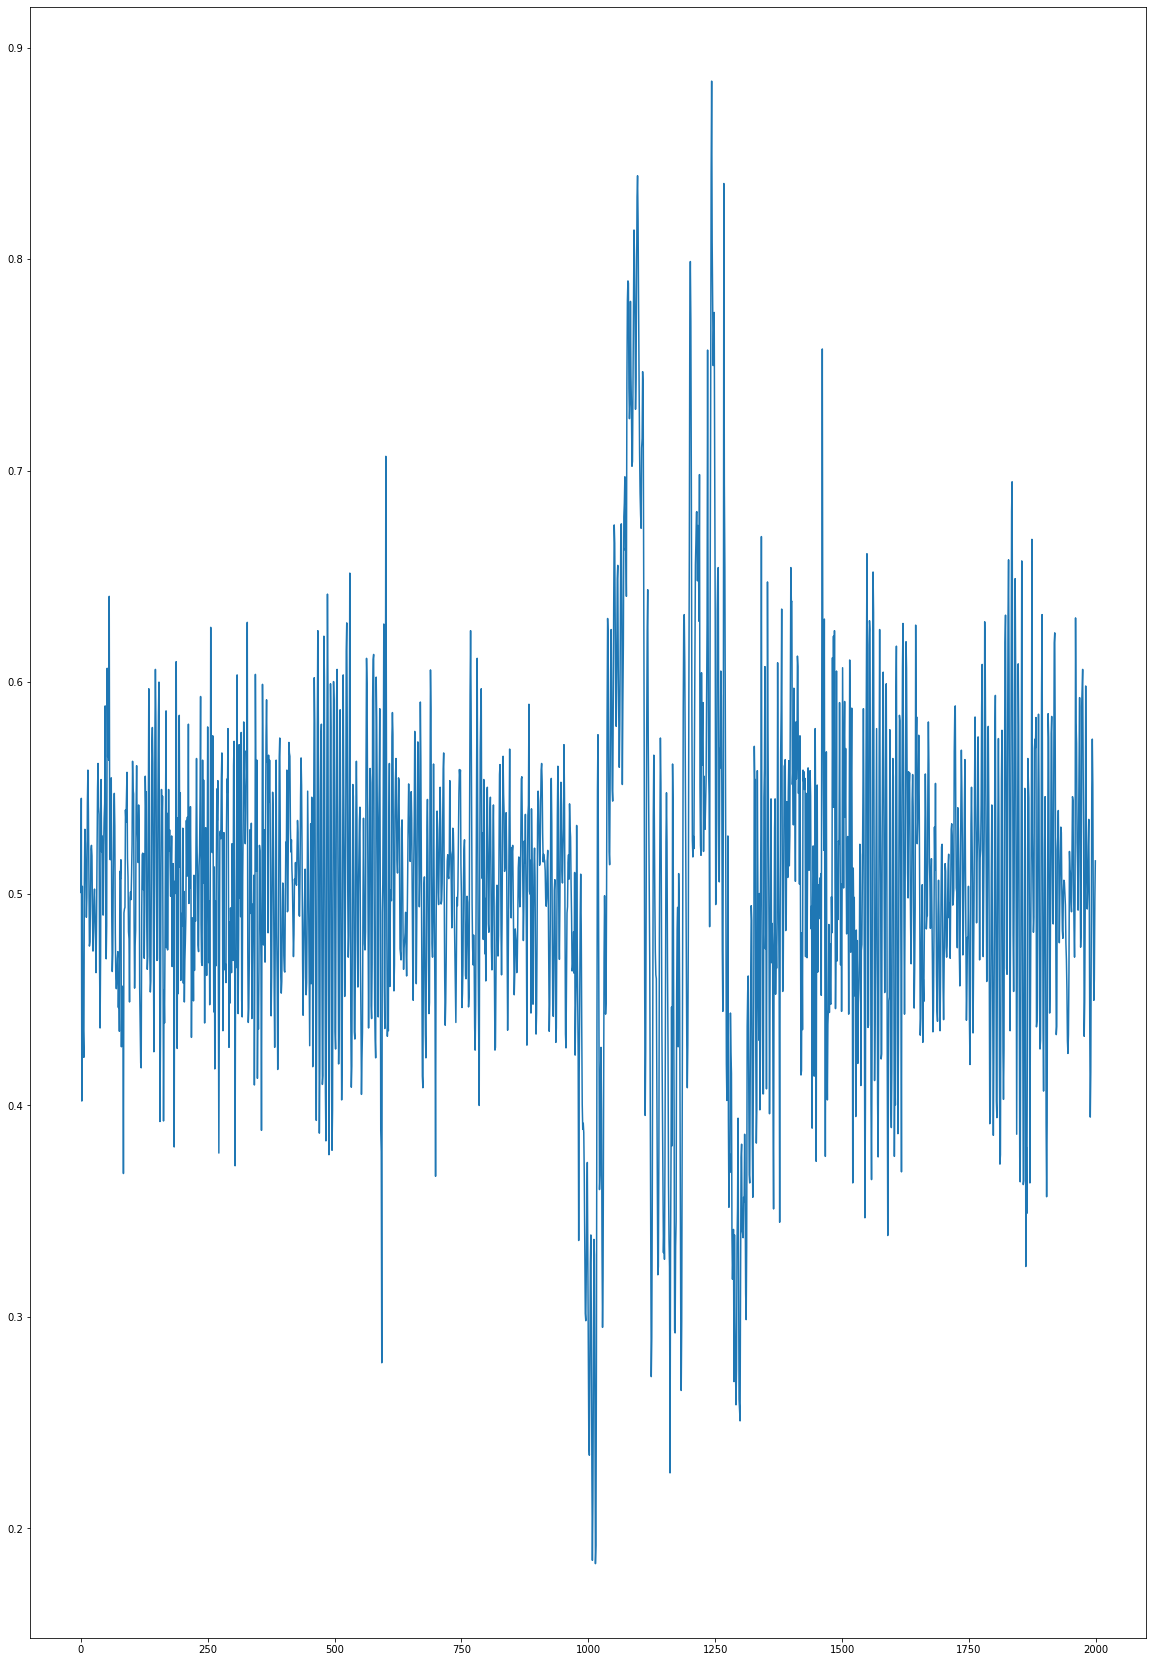

In [12]:
for signal in [healthy_signal, damaged_signal]:

    signal = signal[:2000]
    plt.plot(
        np.arange(signal.shape[0]),
        signal
    )
    plt.show()

_________________
2002
2002
4002
8002
16002
32001
False


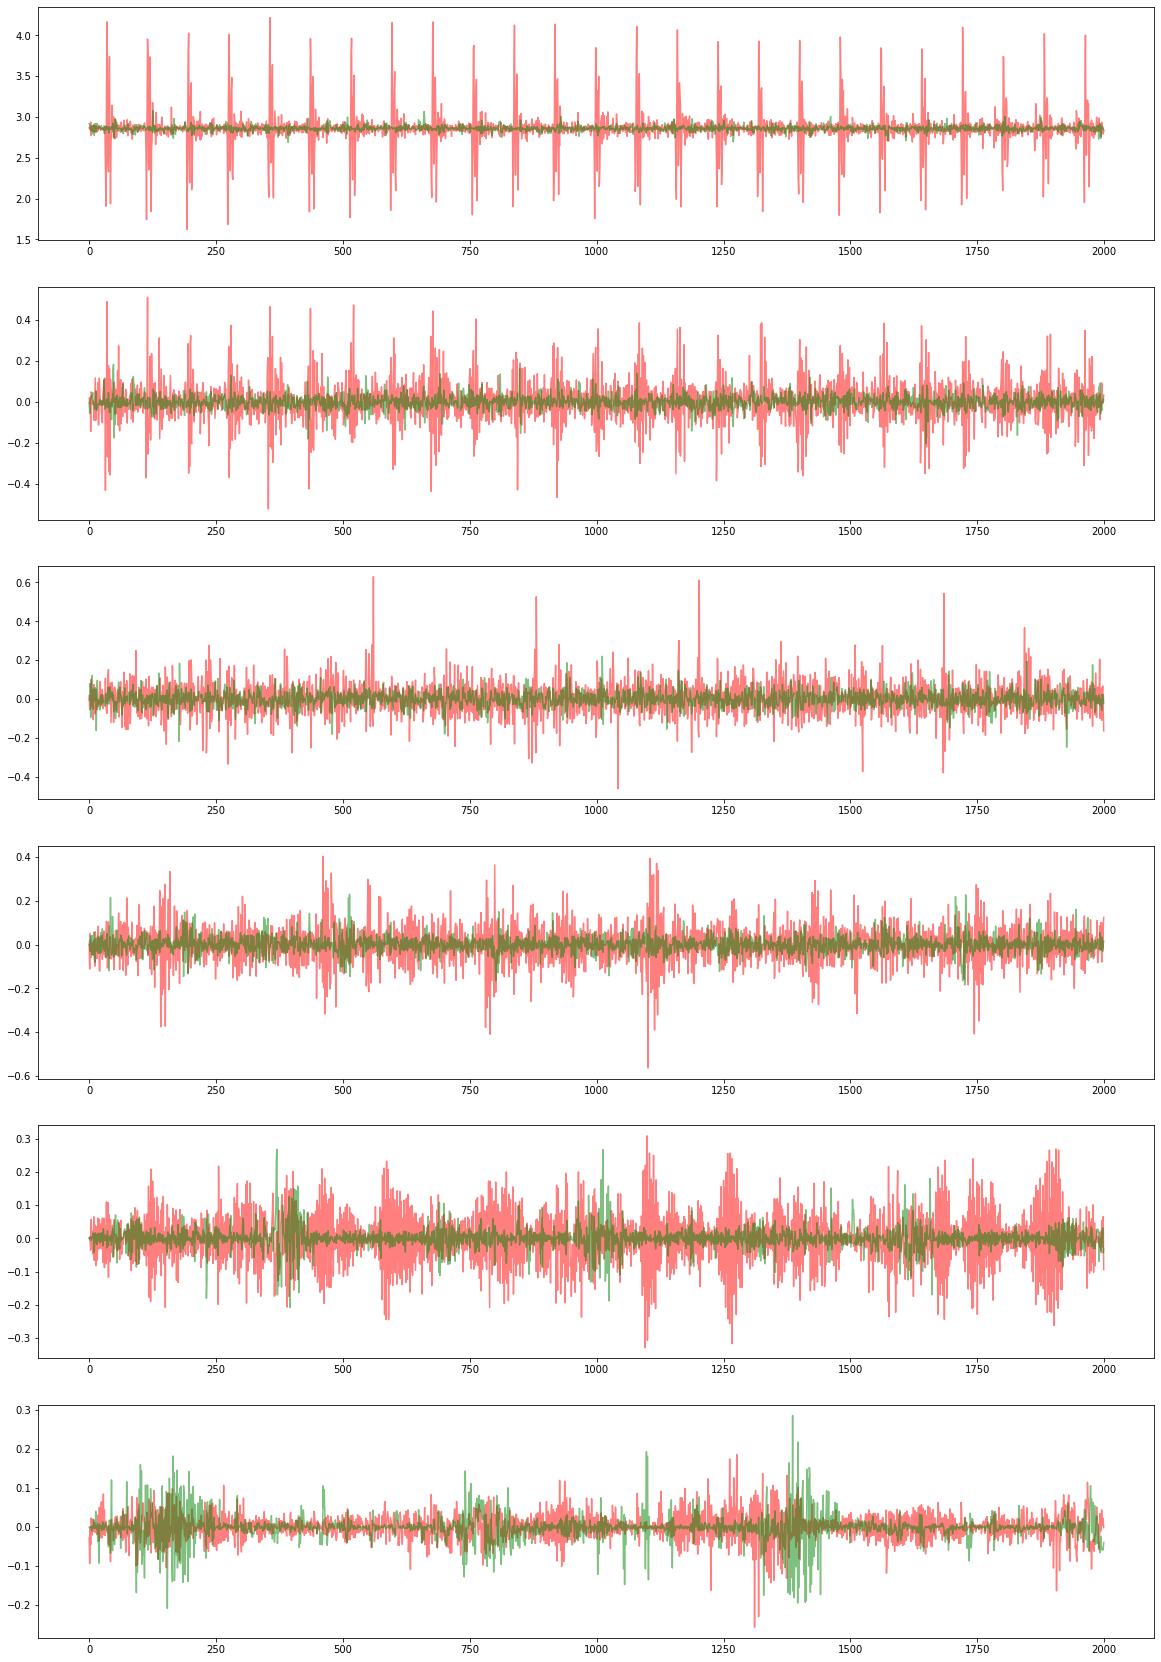

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
ax_i = 0

for i in [5]:
    print('_________________')
    levels = i
    healthy_wavedec = wavedec(healthy_signal, 'db2', level = levels)
    damaged_wavedec = wavedec(damaged_signal, 'db2', level = levels)
    for i, ax in zip(range(levels + 1), [ax1, ax2, ax3, ax4, ax5, ax6]):
        ax_i += 1
        num_coeffs = len(healthy_wavedec[i])
        print(len(healthy_wavedec[i]))
        healthy = False
        for signal in [damaged_wavedec[i], healthy_wavedec[i],]:
            color = 'green' if healthy else 'red'
            ax.plot(
                np.arange(num_coeffs)[:2000],
                signal[:2000],
                alpha = 0.5,
                c = color
            )
            healthy = !healthy

    # plt.title(f'{levels} levels, {i}th array')
    # plt.show()
    if i > 0:
        print((healthy_wavedec[0] == healthy_wavedec[1]).any())

plt.savefig(f'wavelet_comparison.pdf',
            bbox_inches='tight')
plt.show()